In [1]:
cd "/content/drive/MyDrive/Workspace/컴퓨터비전_수업"

/content/drive/MyDrive/Workspace/컴퓨터비전_수업


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 3. 영상을 읽고 표시하기
from google.colab.patches import cv2_imshow
import cv2 as cv
import sys

img = cv.imread('./soccer.jpg')
if img is None:
  sys.exit('파일이 존재하지 않습니다.')

cv2_imshow(img)
print(img[0,0,0], img[0,0,1], img[0,0,2])

cv.waitKey()
# cv2.destroyAllwindows()

print(type (img))
print(img.shape)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# 4. 영상 형태 변환하고 크기 축소하기
import cv2 as cv
import sys
img=cv.imread('soccer.jpg')

if img is None:
  sys.exit('파일을 찾을 수 없습니다.')

gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY) # BGR 2 00
gray_small=cv.resize(gray,dsize=(0,0), fx=0.3, fy=0.3) # 기존 크기의 30%로 축소

cv.imwrite('soccer_gray.jpg',gray)
cv.imwrite('soccer_gray_small.jpg',gray_small)

cv2_imshow(img)
cv2_imshow(gray)
cv2_imshow(gray_small)

cv.waitKey()
cv.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# 5. 웹 캠에서 비디오 읽기
# 6. 비디오에서 수집한 영상 이어 붙이기
import cv2 as cv
import numpy as np
import sys

cap=cv.VideoCapture(0,cv.CAP_DSHOW) # 카메라와 연결 시도

if not cap.isOpened():
  sys.exit('카메라 연결 실패')

frames=[]
while True:
  ret,frame=cap.read()
  if not ret:
    # 비디오를 구성하는 프레임 획득
    print('프레임 획득에 실패하여 루프를 나갑니다.')
    break

  cv.imshow('Video display',frame)
  key=cv.waitKey(1)
  if key==ord('q'):
    break

cap.release()
cv.destroyAllWindows()

SystemExit: 카메라 연결 실패

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
# 6. 비디오에서 수집한 영상 이어 붙이기
import cv2 as cv
import numpy as np
import sys

cap=cv.VideoCapture(0,cv.CAP_DSHOW) # 카메라와 연결 시도

if not cap.isOpened():
  sys.exit('카메라 연결 실패')

frames=[]
while True:
  ret,frame=cap.read()
  if not ret:
    # 비디오를 구성하는 프레임 획득
    print('프레임 획득에 실패하여 루프를 나갑니다.')
    break

  cv.imshow('Video display',frame)
  key=cv.waitKey(1)

  if key==ord('c'):
    frames.append(frame)

  if key==ord('q'):
    break

cap.release()
cv.destroyAllWindows()
#1밀리초 동안 키보드 입력 기다림 # 'q' 키가 들어오면 루프를 빠져나감
#카메라와 연결을 끊음

if len(frames)>0:
  imgs=frames[0]
  for i in range(1,min (3,len(frames))):
    imgs=np.hstack((imgs, frames[i]))

  cv2_imshow('collected images', imgs)
  cv.waitKey()
  cv.destroyAllWindows()

print(len(frames))
print(frames[0].shape)
print(type(imgs))
print(imgs.shape)

SystemExit: 카메라 연결 실패

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


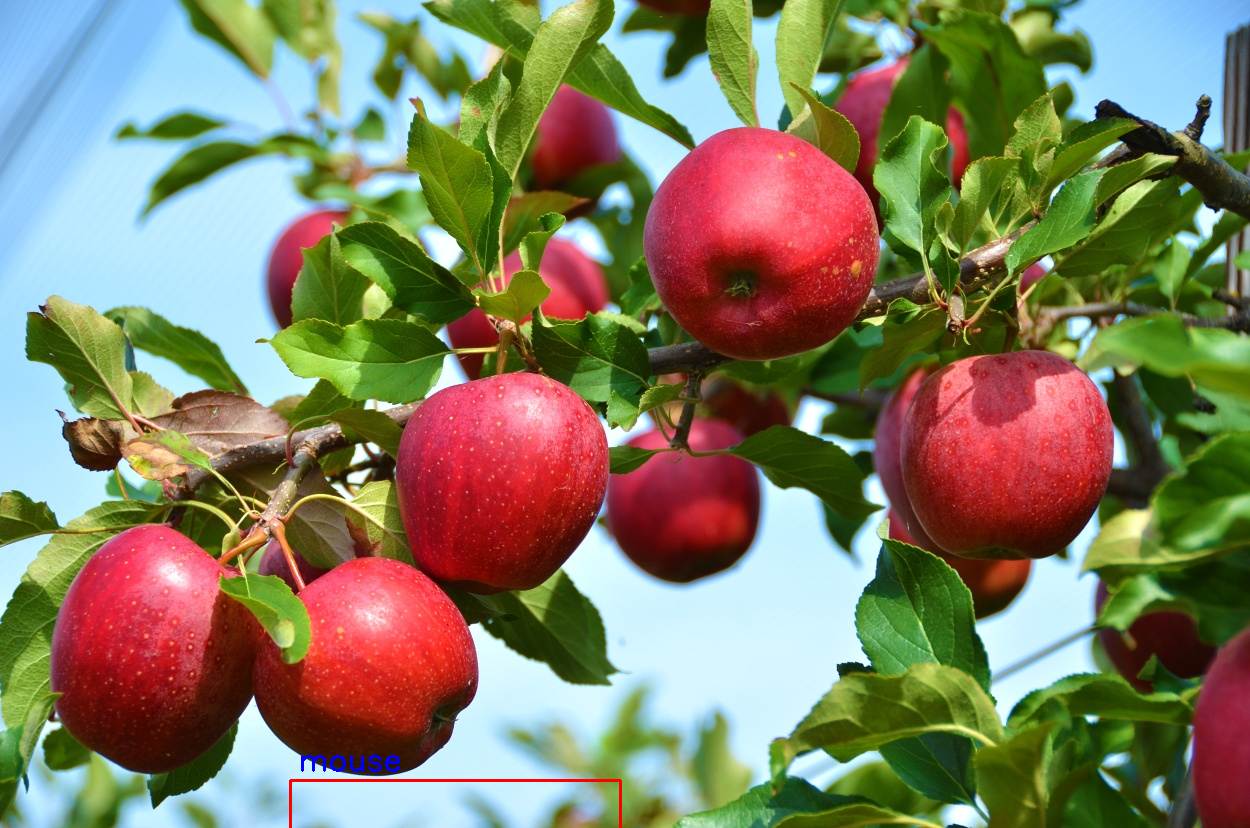

In [8]:
# 6. 비디오에서 수집한 영상 이어 붙이기
import cv2 as cv
import sys
img=cv.imread('./apples.jpg')

if img is None:
  sys.exit('파일을 찾을 수 없습니다.')

cv.rectangle(img, (290,780), (620,950), (0,0,255), 2) #직사각형 그리기
cv.putText(img, 'mouse', (298,770), cv.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2) # | |

cv2_imshow(img)

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# 7. 영상에 도형을 그리고 글씨 쓰기 - 카메라 없어서 오류 남
import cv2 as cv
import sys
img=cv.imread('./apples.jpg')

if img is None:
  sys.exit('파일을 찾을 수 없습니다.')

def draw(event,x,y,flags, param):
  #콜백 함수
  if event==cv.EVENT_LBUTTONDOWN: #^ o* HE
    cv.rectangle(img,(x,y),(x+200,y+200),(0,0,255), 2)
  elif event==cv.EVENT_RBUTTONDOWN:
  # 마우스 오른쪽 버튼 클릭했을 때
    cv.rectangle(img,(x,y),(x+100,y+100),(255,0,0),2)

  cv2_imshow(img)

cv.namedWindow('Drawing')
cv2_imshow(img)

cv.setMouseCallback('Drawing', draw) # Drawing || draw H # 마우스 이벤트가 언제 발생할지 모르므로 무한 반복

while(True):
  if cv.waitKey(1)==ord('q'):
    cv.destroyAllWindows()
    break

In [ ]:
# 8. 마우스 드래그로 도형 크기 조절하기 - 카메라 없어서 오류 남
import cv2 as cv
import sys

img=cv.imread('./apples.jpg')

if img is None:
  sys.exit('파일을 찾을 수 없습니다.')

def draw(event,x,y, flags, param):
  global ix, iy

  if event==cv.EVENT_LBUTTONDOWN: # BE MY ***
    ix,iy=x,y
  elif event==cv.EVENT_LBUTTONUP: #^
    cv.rectangle(img, (ix,iy),(x,y), (0,0,255), 2)
  cv.imshow('Drawing',img)

cv.namedWindow('Drawing')
cv2_imshow('Drawing', img)

cv.setMouseCallback('Drawing', draw)

while(True):
  if cv.waitKey(1)==ord('q'):
    cv.destroyAllWindows()
    break

In [18]:
# 9. 페인팅 기능 만들기.
import cv2
import sys

BrushSize = 5
LColor, RColor=(255,0,0),(0,0,255)


def painting (event, x, y, flags, param):
  if event == cv2.EVENT_LBUTTONDOWN:
    cv2.circle(img, (x, y), BrushSize, LColor, -1)
  elif event == cv2.EVENT_RBUTTONDOWN:
    cv2.circle(img, (x, y), BrushSize, RColor, -1)
  elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
    cv2.circle(img, (x, y), BrushSize, LColor, -1)
  elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_RBUTTON:
    cv2.circle(img, (x, y), BrushSize, RColor, -1)

  cv2_imshow('Painting', img)

In [5]:
import cv2
img = cv2.imread("./soccer.jpg")

if img is None:
  sys.exit("File not exists.")

cv2.nameWindow('Soccer')
cv2_imshow(img)
cv2.setMouseCallback(painting)

while(True):
  if cv2.waitKey(1)==ord('q'):
    cv2.destroyAllWindows()
    break

AttributeError: module 'cv2' has no attribute 'nameWindow'